# Numpy

* Пакет для Python, реализующий многомерные массивы
* Массивы **статически типизированные**. Тип элементов определяется при создании массива.
* Массивы эффективно используют память.
* Методы линейной алгебры в numpy реализованы на C и Fortran, что обеспечивает хорошую производительность.
* Пакет numpy активно используется в научных проектах по всему миру.

In [1]:
import numpy as np

## Создание массивов

Существует несколько способов создания новых numpy массивов:
* через списки и кортежи Python
* используя специальные функции numpy такие, как `arange`, `linspace`, и так далее.
* вычитывая данные из файлов

### 1D массивы

In [3]:
a = np.array([0, 1, 2, 3])
a

array([0, 1, 2, 3])

In [4]:
type(a)

numpy.ndarray

In [5]:
a.dtype

dtype('int64')

In [6]:
a = np.array([0, 1, 2, 3], dtype=np.float16)
a

array([0., 1., 2., 3.], dtype=float16)

In [7]:
a.shape

(4,)

### Многомерные массивы

In [8]:
a = np.array([[1., 2.], [3., 4.]])
a

array([[1., 2.],
       [3., 4.]])

In [9]:
a.shape

(2, 2)

In [10]:
a.ndim

2

In [11]:
a.ndim == len(a.shape)

True

In [12]:
np.size(a) == np.prod(a.shape)

True

При попытке назначить значение другого типа будет выдана ошибка:

In [13]:
a[0, 0] = "hello"

ValueError: could not convert string to float: 'hello'

В numpy существует множество функций для генерации массивов:

### `arange`

Генерирует значения в интервале [start, stop) с шагом step. Аналог встроенной функции Python `range`. На уровне типов они, конечно, отличаются. `np.arange` возвращает обычный numpy-массив, в то время как `range` является lazy sequence/lazy iterable и стоит в общем ряду с `list` и `tuple`. Funny fact: `range` не является итератором -- он не "иссякает", для него нельзя вызвать `next()` и можно `len()`, но, в отличие от списка, он lazy

In [14]:
np.arange(0, 10, 0.1, endpoint=True)

TypeError: arange() got an unexpected keyword argument 'endpoint'

### `linspace` и `logspace`

`linspace` Генерирует равномерно распределенные числа, включая конечные точки.

`logspace` То же, но в логарифмической шкале.

In [15]:
np.linspace(0, 10, 10)

array([ 0.        ,  1.11111111,  2.22222222,  3.33333333,  4.44444444,
        5.55555556,  6.66666667,  7.77777778,  8.88888889, 10.        ])

In [16]:
np.logspace(0.1, 1, 4, base=2)  # [2**(0.1); 2] 

array([1.07177346, 1.31950791, 1.62450479, 2.        ])

### `zeros`, `ones`, `zeros_like` и `ones_like`

In [17]:
m_0 = np.zeros((5, 6))
m_0

array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

In [18]:
m_1 = np.ones((3, 2))
m_1

array([[1., 1.],
       [1., 1.],
       [1., 1.]])

In [19]:
np.zeros_like(m_1)

array([[0., 0.],
       [0., 0.],
       [0., 0.]])

In [20]:
np.ones_like(m_0)

array([[1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1.]])

### Другие функции

In [21]:
c = np.eye(3)
c

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [22]:
np.identity(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [23]:
np.diag([3, 4, 5], k=-2)

array([[0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [3, 0, 0, 0, 0],
       [0, 4, 0, 0, 0],
       [0, 0, 5, 0, 0]])

In [24]:
np.diag(np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]]))

array([1, 5, 9])

### Упражнение 1
Построить диагональную матрицу, на диагонали которой расположены числа от 0 до 3.

In [25]:
np.diag(np.linspace(0, 3, 4))

array([[0., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 2., 0.],
       [0., 0., 0., 3.]])

In [26]:
np.diag(np.arange(0, 4, 1))

array([[0, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 2, 0],
       [0, 0, 0, 3]])

In [27]:
np.diag(np.arange(4))

array([[0, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 2, 0],
       [0, 0, 0, 3]])

### Упражнение 2

Создать матрицу размерности 3x3x3 со случайными значениями, имеющими непрерывное равномерное распределение от 1 до 5.

In [28]:
np.random.uniform(low=1, high=5, size=(3, 3, 3))

array([[[3.08973735, 1.9958287 , 1.93187634],
        [2.1675543 , 2.64849507, 3.71206557],
        [2.37288843, 3.19352783, 4.87605716]],

       [[2.60290945, 2.81274378, 2.52060486],
        [4.31581201, 1.91575325, 1.98338589],
        [4.53645379, 4.5563044 , 4.34668219]],

       [[2.55445932, 4.11395423, 4.25766968],
        [1.93880046, 4.47288075, 1.47691207],
        [2.7064233 , 3.27971905, 3.53441404]]])

## Внутреннее устройство numpy массивов

Рассмотрим представление данных в numpy массиве (иллюстрация взята из [C. Harris et al. (2020)](https://www.nature.com/articles/s41586-020-2649-2))

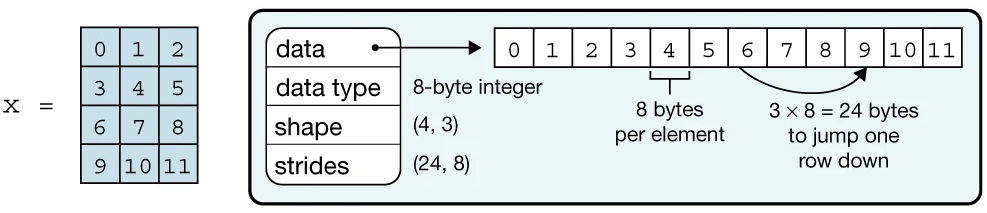

Какой бы shape ни имел массив, в памяти он хранится как обыкновенный линейный массив. В примере показан C-order хранения многомерного массива ("укладываем" массив по строкам $\Longrightarrow$ последний индекс является самым быстрым). Такие массивы называют C-contiguous. Альтернативой является Fortran-order,  где массив "укладывается" по столбцам $\Longrightarrow$ первый индекс является самым быстрым. Такие массивы называют Fortran-contiguous. Узнать, является ли массив C-contiguous или Fortran-contiguous, мы можем с помощью атрибута `flags`. В общем случае numpy используется C-order:

In [29]:
a = np.array([
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9]
])
a.flags

  C_CONTIGUOUS : True
  F_CONTIGUOUS : False
  OWNDATA : True
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False
  UPDATEIFCOPY : False

In [30]:
a.data

Как видно из иллюстрации выше, линейный массив (он же иногда называется буфером), в котором хранятся данные, хранится в атрибуте `data`. Более конкретно, в нем хранится указатель на первый элемент массива, поэтому работать с ним напрямую мы не можем:

### Strides

Другой атрибут, `strides`, задает шаги в байтах, необходимые для перехода к следующему элементу вдоль того или иного индекса. Например, для двумерного массива типа int16 с shape = (4, 3) и C-contiguous буфером мы получим stride = (3x2, 1x2)

In [31]:
a = np.array([
    [0, 1, 2],
    [3, 4, 5],
    [6, 7, 8],
    [9, 10, 11]
], dtype=np.int16)
# (6, 2)
a.strides

(6, 2)

In [32]:
a = np.array([
    [0, 1, 2],
    [3, 4, 5],
    [6, 7, 8],
    [9, 10, 11]
], dtype=np.int16, order="F")
# [0, 3, 6, 9, 1, 4, 7, 10, 2, 5, 8, 11]
# (2, 8)
a.strides

(2, 8)

### Копирование массивов в numpy

Как мы помним, в Python при присваивании не происходит копирование объектов. 

In [33]:
m = np.array([[1, 2], [3, 4]])
m

array([[1, 2],
       [3, 4]])

In [34]:
n = m
n

array([[1, 2],
       [3, 4]])

In [35]:
n[0, 0] = 10
n

array([[10,  2],
       [ 3,  4]])

In [36]:
m

array([[10,  2],
       [ 3,  4]])

Глубокая копия создается в NumPy с помощью функции `copy`:

In [37]:
n = np.copy(m)
n

array([[10,  2],
       [ 3,  4]])

In [38]:
n[0, 0] = -10
n

array([[-10,   2],
       [  3,   4]])

In [39]:
m

array([[10,  2],
       [ 3,  4]])

In [40]:
m.copy()

array([[10,  2],
       [ 3,  4]])

Numpy старается минимизировать количество копирований массивов, в результате чего многие операции, например slicing и в большинстве случаев reshape, возвращают view (представление) массива, а не его копию. Это становится возможным благодаря модификации shape, strides и указателя на первый элемент массива (то есть data). Помня об этом, всегда можно догадаться, произойдет копирование или будет использоваться view: всегда, когда можно построить массив из исходного путем модификации shape, stride и/или сдвига указателя в data, будет использоваться view. Рассмотрим несколько примеров

In [41]:
a = np.array([
    [0, 1, 2],
    [3, 4, 5],
    [6, 7, 8],
    [9, 10, 11]
], dtype=np.int16)
a

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11]], dtype=int16)

In [42]:
b = a[:, ::2]
b

array([[ 0,  2],
       [ 3,  5],
       [ 6,  8],
       [ 9, 11]], dtype=int16)

In [43]:
a.base is None

True

In [44]:
b.base

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11]], dtype=int16)

In [45]:
b.base is a

True

In [46]:
b.strides

(6, 4)

In [47]:
b = a[1::2, :]
b

array([[ 3,  4,  5],
       [ 9, 10, 11]], dtype=int16)

Аналогично можно убедиться, что slicing для взятие каждой второй строки, начиная со второй, так же даст view без какого-либо копирования. В данном случае происходит удвоение stride по первому индексу и сдвиг указателя вперед на один элемент

Из этих примеров становится ясно, что все операции slicing-а приводят к появлению view. Более сложная индексация, которую мы рассмотрим ниже, уже приведет к копированию

### Reshape

Метод `reshape` позволяет изменить shape массива на произвольный shape, дающий то же число элементов, что и оригинальный shape. Иными словами, если $\boldsymbol{s}^{(old)}$ обозначает оригинальный shape, а $\boldsymbol{s}^{(new)}$ - новый shape, то верным является следующее равенство: $\prod_{i=1}^{N_{old}} s_i^{(old)} = \prod_{i=1}^{N_{new}} s_i^{(new)}$.

Понять, каким будет конечный вид массива, легко. Достаточно представить, как текущий массив выглядит в линейной форме в соответствии с C-order или F-order в зависимости от аргумента `order`, передаваемого в `reshape` (по умолчанию используется C-order), и переписать его в многомерный вид в соответствии с новым shape, используя тот же order. Рассмотрим пример ниже

In [48]:
a = np.array([
    [0, 1, 2],
    [3, 4, 5],
    [6, 7, 8],
    [9, 10, 11]
], dtype=np.int16)
a

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11]], dtype=int16)

In [49]:
# [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
# [0, 3, 6, 9, 1, 4, 7, 10, 2, 5, 8, 11]
# [[0, 3, 6, 9, 1, 4],
# [7, 10, 2, 5, 8, 11]]

In [50]:
a.reshape((3, 4))

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]], dtype=int16)

In [51]:
a.reshape((2, 6))

array([[ 0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11]], dtype=int16)

In [52]:
a.reshape(-1)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11], dtype=int16)

In [53]:
a.reshape((-1, 6))

array([[ 0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11]], dtype=int16)

Аналогично мы можем получить reshape для F-order:

In [54]:
a.reshape((2, 2, 3), order="F").flags

  C_CONTIGUOUS : False
  F_CONTIGUOUS : False
  OWNDATA : False
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False
  UPDATEIFCOPY : False

In [55]:
b = a.T
b

array([[ 0,  3,  6,  9],
       [ 1,  4,  7, 10],
       [ 2,  5,  8, 11]], dtype=int16)

In [56]:
b.reshape(-1)

array([ 0,  3,  6,  9,  1,  4,  7, 10,  2,  5,  8, 11], dtype=int16)

Если `reshape` не может гарантировать константный stride, произойдет копирование вместо view. Например, такая ситуация возможна при выравнивании транспонированного массива:

## Слияние массивов

Функции `vstack`, `hstack` и `concatenate` позволяются составить общий массив из нескольких массивов:

### `concatenate`

In [57]:
a = np.array([[1, 2], [3, 4]])
a

array([[1, 2],
       [3, 4]])

In [58]:
b = np.array([[5, 6]])
b

array([[5, 6]])

In [59]:
b.shape

(1, 2)

In [60]:
np.concatenate((a, b), axis=0)

array([[1, 2],
       [3, 4],
       [5, 6]])

In [61]:
np.concatenate((a, b.T), axis=1)

array([[1, 2, 5],
       [3, 4, 6]])

### `hstack` и `vstack`

In [62]:
np.vstack((a, b))

array([[1, 2],
       [3, 4],
       [5, 6]])

In [63]:
np.hstack((a, b.T))

array([[1, 2, 5],
       [3, 4, 6]])

## Индексация

Доступ к данным массива организуется с помощью индексов и оператора `[]`.

In [64]:
a = np.arange(10)
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [68]:
a[-3]

7

### Basic indexing

Для многомерных массивов индексами является кортеж целых чисел, то есть записи `m[1, 1]` и `m[(1, 1)]` эквивалентны

In [72]:
m = np.diag(np.arange(3))
m

array([[0, 0, 0],
       [0, 1, 0],
       [0, 0, 2]])

Можно использовать "`:`" для получения доступа к целой колонке или строке: 

In [73]:
m[0, 2]

0

In [74]:
m[(0, 2)]

0

In [76]:
m[:, 2]

array([0, 0, 2])

In [83]:
m[1::2, ::2] = [-100, -200]

In [84]:
m

array([[   0,    0,    0],
       [-100,    1, -200],
       [   0,    0,    2]])

Присваивание новых значений элементам массива:

### Slicing

NumPy поддерживает слайсинг, как и списки с кортежами в Python:

Отрицательные индексы отсчитываются от конца массива:

Слайсы являются представлениями массива, а потому являются изменяемыми:

Слайсинг работает точно так же и для многомерных массивов:

### Advanced indexing

Если аргументом квадратных скобок является не-tuple последовательность целых чисел или булевых значений, а также любая последовательность последовательностей, то используется режим advanced indexing. Он позволяет выбирать произвольные элементы массивы. Обратите внимание, что advanced indexing всегда возвращает копию массива, а не view

Пример ниже возвращает два элемента матрицы: $m_{21}$ и $m_{22}$. В этом примере неявно использовался tuple, так что ниже приводят несколько эквивалентных примеров

In [86]:
m

array([[   0,    0,    0],
       [-100,    1, -200],
       [   0,    0,    2]])

In [87]:
m[(0, 0, 2), (0, 1, 2)]

array([0, 0, 2])

### Упражнение 3
Создать нулевую матрицу размерности 5х5 с единицами по ее "границам".

In [89]:
a = np.ones((5, 5), dtype=np.int_)
a[1:-1:, 1:-1:] = 0
a

array([[1, 1, 1, 1, 1],
       [1, 0, 0, 0, 1],
       [1, 0, 0, 0, 1],
       [1, 0, 0, 0, 1],
       [1, 1, 1, 1, 1]])

In [90]:
a = np.zeros((5, 5), dtype=np.int_)
a[(0, -1), :] = 1
a[:, (0, -1)] = 1
a

array([[1, 1, 1, 1, 1],
       [1, 0, 0, 0, 1],
       [1, 0, 0, 0, 1],
       [1, 0, 0, 0, 1],
       [1, 1, 1, 1, 1]])

In [91]:
a = np.zeros((3, 3), dtype=np.int_)
np.pad(a, pad_width=1, constant_values=1)

array([[1, 1, 1, 1, 1],
       [1, 0, 0, 0, 1],
       [1, 0, 0, 0, 1],
       [1, 0, 0, 0, 1],
       [1, 1, 1, 1, 1]])

### Упражнение 4

Создать матрицу размерности 8х8 в виде шахматной доски, где черный цвет соответствует нулям, а белый - единицам.

In [92]:
a = np.zeros((8, 8), dtype=np.int_)
a[::2, ::2] = 1
a[1::2, 1::2] = 1
a

array([[1, 0, 1, 0, 1, 0, 1, 0],
       [0, 1, 0, 1, 0, 1, 0, 1],
       [1, 0, 1, 0, 1, 0, 1, 0],
       [0, 1, 0, 1, 0, 1, 0, 1],
       [1, 0, 1, 0, 1, 0, 1, 0],
       [0, 1, 0, 1, 0, 1, 0, 1],
       [1, 0, 1, 0, 1, 0, 1, 0],
       [0, 1, 0, 1, 0, 1, 0, 1]])

### Упражнение 5

Повернуть матрицу размерности 3х3 на 90 градусов по часовой стрелке.

Пример матрицы:
```python
a = np.array([
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9],
])
```

In [93]:
a = np.array([
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9],
])

a[::-1].T

array([[7, 4, 1],
       [8, 5, 2],
       [9, 6, 3]])

In [94]:
b = np.zeros((3, 3), dtype=np.int_)
for i in range(b.shape[0]):
    b[i, :] = a[::-1, i]
b

array([[7, 4, 1],
       [8, 5, 2],
       [9, 6, 3]])

## Статистики

Средства numpy позволяют анализировать элементарные статистические свойства выборки, хранящейся в массиве.

### `sum`

In [99]:
a = np.arange(1, 10)
np.sum(a)

45

In [100]:
a.sum()

45

In [108]:
m = np.array([
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9],
])
m.sum()

45

In [109]:
m.sum(axis=0)

array([12, 15, 18])

In [110]:
m.sum(axis=1)

array([ 6, 15, 24])

In [113]:
np.median(m, axis=0)

array([4., 5., 6.])

### `prod`

In [101]:
np.prod(a)

362880

### `mean`

In [102]:
np.mean(a)

5.0

### `median`

Возвращает значение медианы, то есть 50-го персентиля выборки.

In [103]:
np.median(a)

5.0

### `std`

Возвращает стандартное отклонение выборки.

In [104]:
np.std(a)

2.581988897471611

### `min` and `max`

In [105]:
a.min(), a.max()

(1, 9)

### `percentile`

Возвращает персентили, соответствующие входному аргументу `q`

In [106]:
np.percentile(a, q=(25, 50, 75))

array([3., 5., 7.])

### `unique`

Возвращает отсортированный массив уникальных элементов входного массива.

In [107]:
np.unique([0, 0, 1, 1, 6, 7, 3, 3, 3])

array([0, 1, 3, 6, 7])

### Упражнение 6

Дан временной ряд дневной цены некоторого актива:
```python
stock_prices = np.array([100, 102, 101, 105, 107, 110, 108, 109, 112, 115, 114, 116, 118, 120, 119])
```
Постройте временной ряд недельного скользящего среднего, то есть скользящего среднего с окном, равным одной неделе. При построении скользящего среднего ряда игнорируйте ту часть исходного временного ряда, где в окно попадает меньше одной недели.

In [115]:
stock_prices = np.array([100, 102, 101, 105, 107, 110, 108, 109, 112, 115, 114, 116, 118, 120, 119])
n = 7
ma = np.zeros((len(stock_prices) - (n - 1),))
for i in range(len(ma)):
    ma[i] = stock_prices[i: i + n].mean()
ma

array([104.71428571, 106.        , 107.42857143, 109.42857143,
       110.71428571, 112.        , 113.14285714, 114.85714286,
       116.28571429])

## Линейная алгебра

Код, написанный на numpy становится эффективным тогда, когда он достаточно векторизован (т.е. векторные и матричные операции используются в бОльшей части программы).

### Поэлементные операции

Все арифметические операции по умолчанию являются поэлементными:

In [17]:
a = np.arange(4)
b = np.ones((4,), dtype=np.int_)

NameError: name 'np' is not defined

In [117]:
a + 1

array([1, 2, 3, 4])

In [15]:
a + b

NameError: name 'a' is not defined

In [121]:
a * 2

array([0, 2, 4, 6])

In [122]:
2**a

array([1, 2, 4, 8])

In [123]:
a**2

array([0, 1, 4, 9])

In [124]:
2**(a + 1) - a

array([ 2,  3,  6, 13])

### Операции между массивами

In [125]:
a + b

array([1, 2, 3, 4])

In [126]:
a * b

array([0, 1, 2, 3])

In [131]:
b = np.array([5, 6, 7, 8])

In [132]:
a**b

array([   0,    1,  128, 6561])

Сравнения:

In [133]:
a = np.array([1, 2, 3, 4])
b = np.array([4, 2, 2, 4])

In [134]:
a == b

array([False,  True, False,  True])

In [135]:
a > b

array([False, False,  True, False])

In [136]:
a != b

array([ True, False,  True, False])

In [138]:
a = np.array([1, 1, 0, 0], dtype=bool)
b = np.array([1, 0, 1, 0], dtype=bool)

In [139]:
a | b

array([ True,  True,  True, False])

In [140]:
a & b

array([ True, False, False, False])

Логические операции:

Использование логических операторов позволяет обращаться к элементам массива через маску:

In [141]:
a = np.array([1, 2, 3, 4])
b = np.array([4, 2, 2, 4])

In [143]:
mask = a == b
mask

array([False,  True, False,  True])

In [144]:
a[mask]

array([2, 4])

In [145]:
b[mask]

array([2, 4])

In [146]:
m = np.array([
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9],
])

In [148]:
m[m > 5]

array([6, 7, 8, 9])

### Упражнение 7

Дана выборка зарплат:

```python
salaries = np.array([58000, 60000, 62000, 20000, 1000000, 52000, 54000, 68000, 70000, 56000, 64000])
```

Найдите усеченное среднее, то есть среднее, получаемое после удаления выбросов из выборки. Выбросами будем называть те элементы выборки, которые выпадают за пределы интервала $[Q_1 - 1.5 IQR; Q_3 + 1.5 IQR]$, где $Q_1$ - первый квартиль (25-й персентиль), $Q_3$ - третий квартиль (75-й персентиль), а $IQR = Q_3 - Q_1$ - межквартильный размах.

In [151]:
salaries = np.array([58000, 60000, 62000, 20000, 1000000, 52000, 54000, 68000, 70000, 56000, 64000])
quartiles = np.percentile(salaries, q=[25, 75])
iqr = quartiles[1] - quartiles[0]
l = quartiles[0] - 1.5 * iqr
r = quartiles[1] + 1.5 * iqr
np.mean(salaries[(salaries > l) & (salaries < r)])

60444.444444444445

### Упражнение 8
Создать случайную матрицу размерности 10х2, хранящую декартовы координаты. Затем конвертируйте их в полярные координаты.

In [153]:
a = np.random.random((10, 2))
x, y = a[:, 0], a[:, 1]
r = np.sqrt(x**2 + y**2)
phi = np.arctan2(y, x)
a_transformed = np.column_stack((r, phi))
a_transformed

array([[0.73816965, 0.87425311],
       [0.87635991, 0.89681747],
       [0.86564862, 1.48520375],
       [0.43917767, 1.09348612],
       [0.80741391, 0.48394568],
       [0.23980242, 1.43182102],
       [0.95858481, 0.71564961],
       [1.01972861, 0.97937693],
       [0.95243704, 1.3377638 ],
       [0.65919595, 0.24073109]])

### Матричная алгебра

Перемножение массивов является поэлементным. Для матричного умножения необходимо использовать функцию `dot`:

In [155]:
m = np.array([
    [1., 2],
    [3., 4.]
])
m

array([[1., 2.],
       [3., 4.]])

In [157]:
m @ m

array([[ 7., 10.],
       [15., 22.]])

In [158]:
m.dot(m)

array([[ 7., 10.],
       [15., 22.]])

Взятие обратной:

In [160]:
m_inv = np.linalg.inv(m)
m_inv

array([[-2. ,  1. ],
       [ 1.5, -0.5]])

Вычисление определителя:

In [161]:
np.linalg.det(m)

-2.0000000000000004

Нахождение собственных чисел:

In [162]:
eig_values, eig_vectors = np.linalg.eig(m)

In [163]:
eig_values

array([-0.37228132,  5.37228132])

In [164]:
eig_vectors

array([[-0.82456484, -0.41597356],
       [ 0.56576746, -0.90937671]])

In [166]:
eig_vectors @ np.diag(eig_values) @ np.linalg.inv(eig_vectors)

array([[1., 2.],
       [3., 4.]])

### Трансформирование массивов

Для транспонирования матриц используется либо `.T`, либо функция `transpose`:

In [167]:
m.T

array([[1., 3.],
       [2., 4.]])

In [168]:
m.transpose()

array([[1., 3.],
       [2., 4.]])

Другие математические функции:

In [174]:
c = np.matrix([
    [1j, 2j],
    [3j, 4j],
])
c

matrix([[0.+1.j, 0.+2.j],
        [0.+3.j, 0.+4.j]])

In [175]:
np.conjugate(c)

matrix([[0.-1.j, 0.-2.j],
        [0.-3.j, 0.-4.j]])

Эрмитово-сопряженная матрица(transpose + conjugate):

In [176]:
c.H

matrix([[0.-1.j, 0.-3.j],
        [0.-2.j, 0.-4.j]])

Вещественная и мнимая части могут быть получены с помощью `real` и `imag`:

In [177]:
np.real(c)

matrix([[0., 0.],
        [0., 0.]])

In [178]:
np.imag(c)

matrix([[1., 2.],
        [3., 4.]])

Модули элементов матрицы:

In [179]:
np.abs(c)

matrix([[1., 2.],
        [3., 4.]])

### Упражнение 9

Найти ортогональную проекцию вектора $\boldsymbol{b} = [1, 0, 0]$ на подпространство, задаваемое векторами $\boldsymbol{v}^{(1)} = [1, 2, 3]$ и $\boldsymbol{v}^{(2)} = [4, 5, 6]$

In [181]:
v1 = np.array([1, 2, 3], dtype=np.float_)
v2 = np.array([4, 5, 6], dtype=np.float_)
b = np.array([1, 0, 0], dtype=np.float_)

V = np.column_stack((v1, v2))
P = V @ np.linalg.inv(V.T @ V) @ V.T
b_proj = P @ b
b_proj

array([ 0.83333333,  0.33333333, -0.16666667])

In [182]:
V.T @ (b - b_proj)

array([6.66133815e-16, 1.33226763e-15])

### Упражнение 10
Найти ближайшее значение к числу 4 в векторе [4.3, 1.0, 3.9, 5.0, 2.0, 1.9]

## Векторизация функций

Numpy предлагает средства для создания векторизованных оберток над функциями, которые изначально принимают на вход скалярные значения.

# Matplotlib

* Пакет для Python, используемый для создания качественных 2D визуализацией (есть минимальная поддержка 3D)
* Возможность создавать интерактивные графики
* Добавление множества графиков на один рисунок с кастомным расположением
* Экспорт в различные форматы изображений
* Есть поддержка анимаций

In [ ]:
# Позволяет matplotlib отображать графики сразу в notebook.
%matplotlib inline

## Matplotlib API

Импортирование модуля `matplotlib.pyplot` под именем `plt`:

In [ ]:
import matplotlib.pyplot as plt

### Визуализация кривых на плоскости

Простейший пример построения графиков в matplotlib:

Интерфейс `subplots` позволяет создавать сетку из множественных графиков

Иногда удобным оказывается использование логарифмической шкалы. Это можно сделать с помощью методов `semilogx`, `semilogy` или `loglog`. По умолчанию они используют основание 10

### Сохранение графиков

Текущий график можно сохранить, вызвав метод `savefig` класса `Figure`:

Также можно указать DPI и различные форматы:

### Легенды, описания осей и графиков

**Заголовок графика**


`axes.set_title("title")`

**Описания осей**


`axes.set_xlabel("x")
axes.set_ylabel("y")`

**Легенда**

Легенды могут создаваться двумя способами. Первый -- явно через метод `legend`:

`axes.legend(["curve1", "curve2"])`

Второй метод -- использование `label="label text"` при вызове `plot` с последующим вызовом метода `legend`: 

`axes.plot(x, x**2, label="curve1")
axes.plot(x, x**3, label="curve2")
axes.legend()`

Также можно выбрать расположение легенды на графике:

`ax.legend(loc=0) # автовыбор
ax.legend(loc='upper right')
ax.legend(loc='upper left')
ax.legend(loc='lower left')
ax.legend(loc='lower right')`

Пример использования описанного выше:

### Визуализация поверхностей и 2D массивов

Matplotlib предоставляет четыре основные метода для построения подобных визуализаций: `contour`, `contourf`, `imshow` (частный случай: `matshow`) и `pcolormesh` (менее эффективная альтернатива: `pcolor`).

Методы `contour` и `contourf` используются для построения линий уровня:

Метод `imshow` удобен для визуализации многоканальных изображений. Его же используют для визуализации матриц. Он по умолчанию проставляет ticks так, что они соответствуют индексам матрицы, и при этом ведет индексацию сверху вниз и слева направо, как это происходит в изображениях и матрицах.